In [45]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


# Plot a Single graph

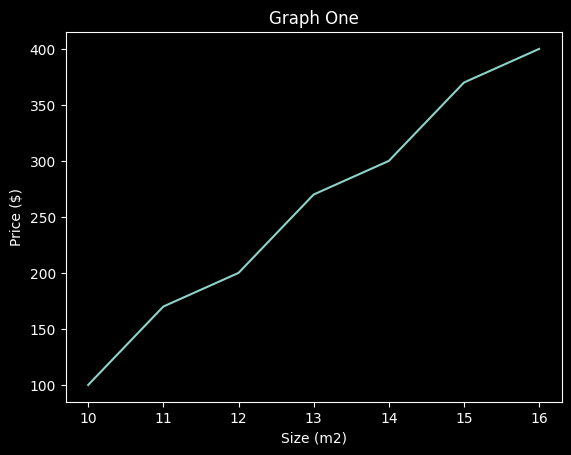

In [3]:
x = [10, 11, 12, 13, 14, 15, 16]
y = [100, 170, 200, 270, 300, 370, 400]
plt.plot(x,y)
plt.title('Graph One')
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.show()

# Plot 2 Graphs on a Chart

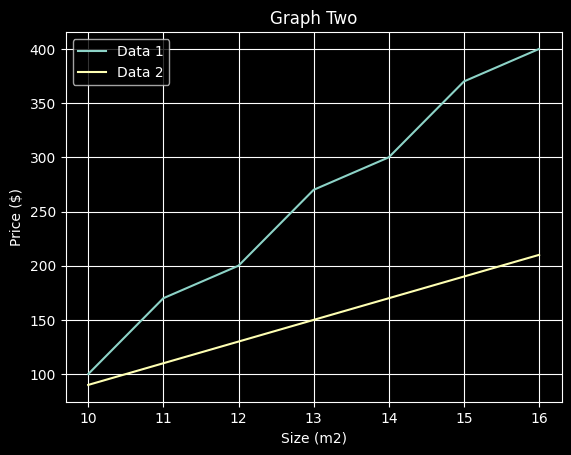

In [12]:
A = [10, 11, 12, 13, 14, 15, 16]
B1 = [100, 170, 200, 270, 300, 370, 400]
B2 = [90, 110, 130, 150, 170, 190, 210]
plt.plot(A, B1)
plt.plot(A, B2)
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.title('Graph Two')
plt.legend(['Data 1', 'Data 2'])
plt.show()


# Styling with Colors, Linestyles, Markers

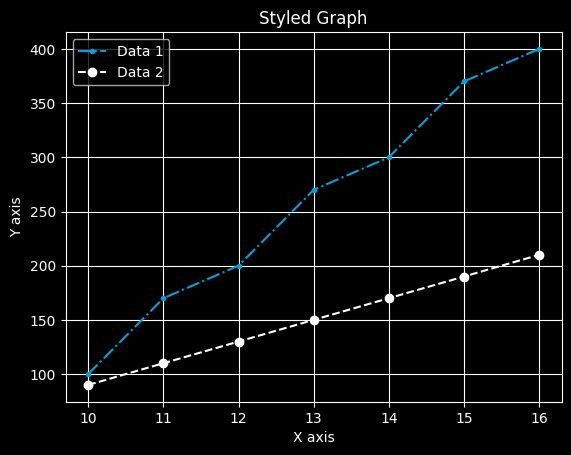

In [26]:
plt.plot(A, B1, color='#00A1D9', linestyle='-.', marker='.', label='Data 1',)
plt.plot(A, B2, color='#fff', linestyle='--', marker='o', label='Data 2',)
plt.legend()
plt.title('Styled Graph')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()


In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# importing libraries and reading data


In [47]:
df = pd.read_csv("/home/abdallah/Courses/Kiwilytics_DE/Kiwilytics_DE_Docker/python/cleaned_orders_final.csv")
df.head()

,OrderID,CustomerID,OrderDate,ShippedDate,ShippingCost,ShipCountry,ShipCity,ShippingCompany,IsDelayed
0,1000.0,C001,2025-05-17,2025-07-30,NaN,Germany,Hamburg,Kiwilytics Goods Shipping LLC.,True
1,1001.0,C002,2025-01-26,2025-07-30,320.61,Canada,Montreal,UPS,True
2,1002.0,C003,2025-03-08,2025-07-30,165.17,Canada,Vancouver,FedEx Logistics,True
3,1003.0,C004,2025-03-24,2025-07-30,12.55,Germany,Munich,Aramex International,True
4,1004.0,C005,2025-04-15,2025-07-30,186.36,Canada,Vancouver,FedEx Logistics,True


In [48]:
pd.to_datetime(df["OrderDate"], format="%Y-%m-%d", errors="coerce")

0     2025-05-17
1     2025-01-26
2     2025-03-08
3     2025-03-24
4     2025-04-15
         ...    
240   2024-11-19
241          NaT
242   2025-01-16
243   2024-09-16
244   2025-01-28
Name: OrderDate, Length: 245, dtype: datetime64[ns]

# Visualization 1: Shipping Cost by Country

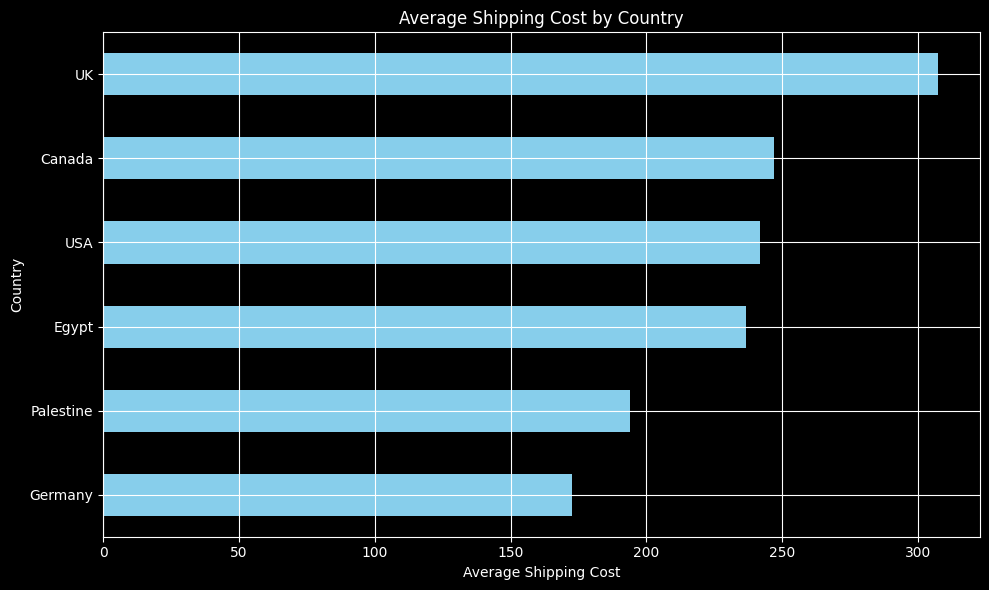

In [53]:
plt.figure(figsize=(10,6))
df.groupby("ShipCountry")["ShippingCost"].mean().sort_values().plot(kind="barh",color="skyblue")
plt.title("Average Shipping Cost by Country")
plt.xlabel("Average Shipping Cost")
plt.ylabel("Country")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 2: Delivery Days Distribution

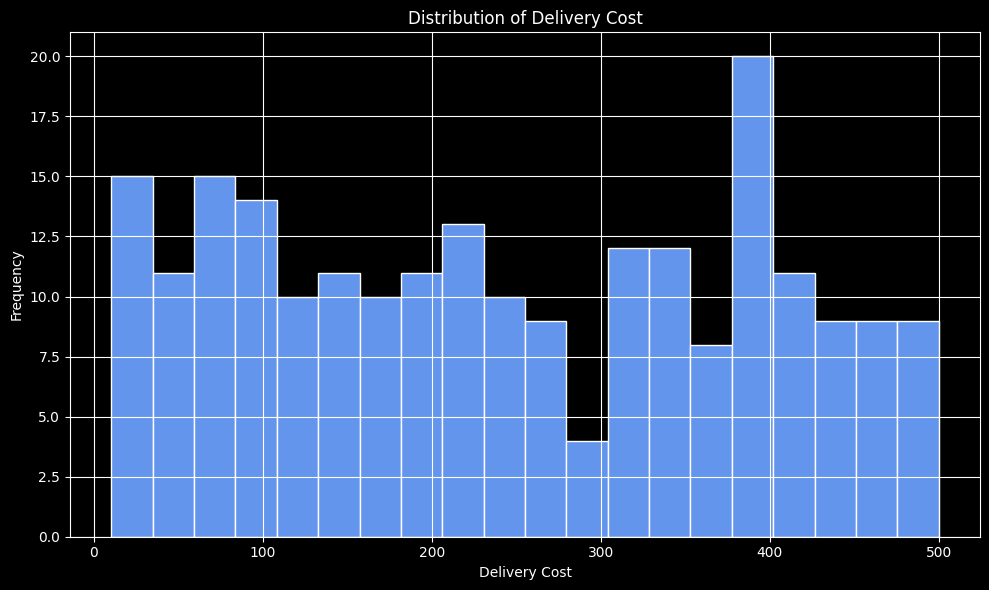

In [70]:
plt.figure(figsize=(10, 6))
df["ShippingCost"].plot(kind="hist", bins=20, color="#6495ED", edgecolor="white")
plt.title("Distribution of Delivery Cost")
plt.xlabel("Delivery Cost")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 3: Delivery Status Count


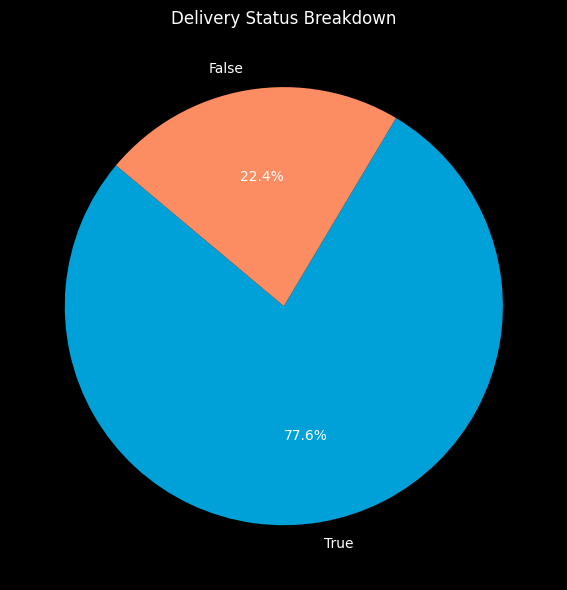

In [75]:
plt.figure(figsize=(6, 6))
df["IsDelayed"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=140, colors=["#00A1D9", "#fc8d62", "#66c2a5"])
plt.title("Delivery Status Breakdown")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Visualization 4: Monthly Order Volume

In [101]:
# df["OrderDate"] = pd.to_datetime(df["OrderDate"],format="%Y-%m-%d", errors="coerce")
# df = df.dropna(subset=["OrderDate"])
df["Months"] = df["OrderDate"].dt.to_period("M")
df["Months"]

0      2025-05
1      2025-01
2      2025-03
3      2025-03
4      2025-04
        ...   
239    2025-07
240    2024-11
242    2025-01
243    2024-09
244    2025-01
Name: Months, Length: 226, dtype: period[M]

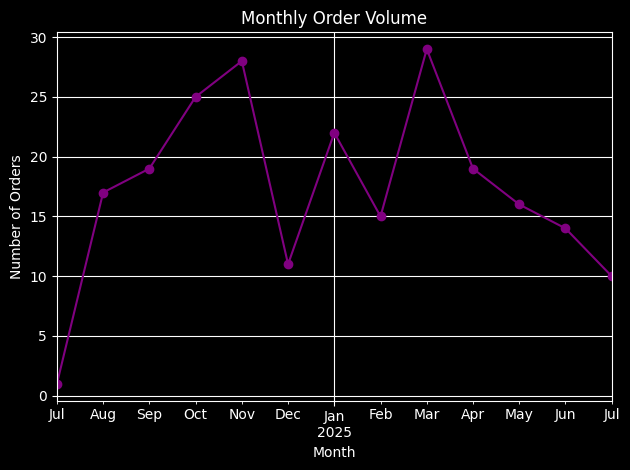

In [105]:
monthly_orders = df.groupby("Months").size()
monthly_orders.plot(kind="line",marker="o",color = "purple")
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

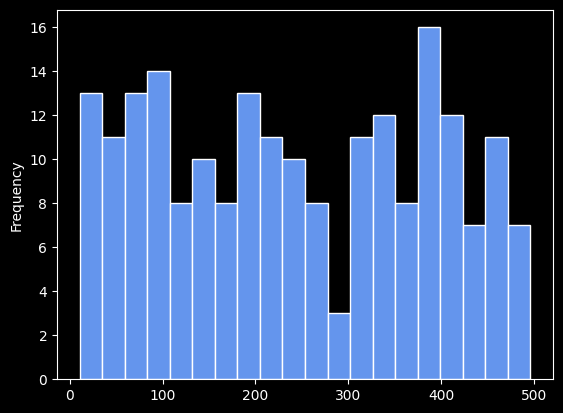

In [106]:
# histograms
df["ShippingCost"].plot(kind="hist", bins=20, color="#6495ED", edgecolor="white")
